In [1]:
#importing all necessary libraries and packages

import pandas as pd
import geopandas as gpd
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib import gridspec as gridspec
import statsmodels.api as sm
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import geoplot as gplt
import geoplot.crs


In [2]:
#reading in shapefile of the durham beats
beats = gpd.read_file("/Users/morganbernstein/Desktop/Data+/filtered_beats/filtered_beats.shp")

#reading in the shapefile of durham county
durham_county = gpd.read_file("/Users/morganbernstein/Desktop/DATA+/DurhamBlockMap/DurhamBlockMap.shp")

#reading in the dataset of all arrests and police beats
data = pd.read_csv("/Users/morganbernstein/Desktop/DATA+/SToPAGetDurhamData/10 Clean Data/with_beats.csv", low_memory=False)

In [5]:
#changing every row w=with race O to race U
data.loc[data["race"] == "O", "race"] = "U"

# converting data into pandas geo dataframe with a 
# geometry column using the longitude and latitude columns of the dataset
geodata = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.longitude, data.latitude)
)


Text(92.24210578838581, 0.5, 'Latitude')

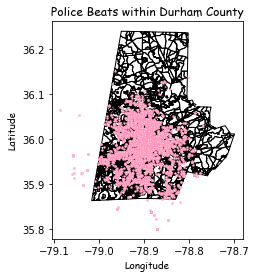

In [6]:
#OVERLAP TWO SHAPEFILES INTO ONE: durham county file and police beats file

plt.rcParams["figure.figsize"] = (9,7)

ax = durham_county.plot(color='none', edgecolor='black')
geodata.plot(ax=ax, color='pink', edgecolor='hotpink', markersize=5, linewidth=.2)


plt.title("Police Beats within Durham County", family = "Comic Sans MS")
plt.xlabel('Longitude', family = "Comic Sans MS")
plt.ylabel('Latitude', family = "Comic Sans MS")

/Users/morganbernstein/opt/anaconda3/envs/geo/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'cmaps', 'edgecolor'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


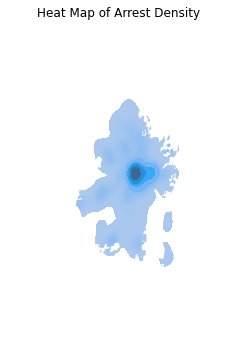

In [8]:
#Plotting a heatmap of the number of arrests in the area of the police beats

ax = gplt.kdeplot(
    geodata, clip = beats.geometry,
    shade = True, cmaps = "Reds",
    projection = gplt.crs.AlbersEqualArea(), edgecolor="black")
gplt.polyplot(geodata, ax=ax, zorder = 1, edgecolor="black")

plt.title("Heat Map of Arrest Density")
plt.show()

<GeoAxesSubplot:>

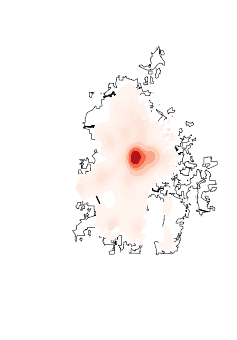

In [18]:
#making another heatmap with reds of the number of arrests in the area of the police beats

ax = gplt.polyplot(beats, projection=gplt.crs.AlbersEqualArea(), zorder=1, edgecolor="black")
gplt.kdeplot(geodata, cmap='Reds', shade=True, clip=beats, ax=ax)


<GeoAxesSubplot:>

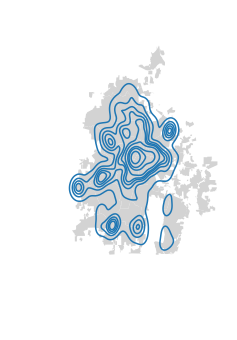

In [19]:
#making a heat map (lines) of the number of arrests in the area of the police beats

ax = gplt.polyplot(
    beats, projection=gplt.crs.AlbersEqualArea(),
    edgecolor='None', facecolor='lightgray'
)
gplt.kdeplot(
    geodata[geodata['geometry'].notnull()],
    ax=ax
)

<GeoAxesSubplot:>

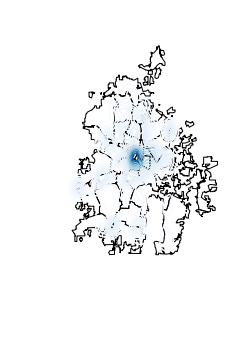

In [20]:
#another heatmap, showing the police beats

ax = gplt.polyplot(beats, projection=gplt.crs.AlbersEqualArea())
gplt.kdeplot(geodata, n_levels=20, cmap='Blues', ax=ax)

<GeoAxesSubplot:>

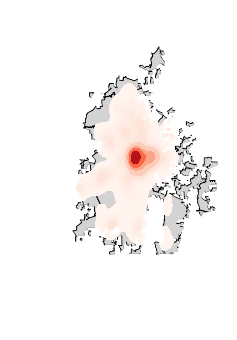

In [21]:
#another heatmap with the gray area of the police beats

ax = gplt.polyplot(beats, projection=gplt.crs.AlbersEqualArea(), zorder=1, edgecolor="black", facecolor='lightgray')
gplt.kdeplot(geodata, cmap='Reds', shade=True, clip=beats, ax=ax)